# 1. Import Libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from warnings import filterwarnings
filterwarnings('ignore')

from jcopml.plot import plot_missing_value
from jcopml.automl import AutoClassifier
from jcopml.utils import save_model, load_model

# 2. Import Dataset

In [60]:
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Renaming columns

In [61]:
for col in df.columns:
    df.rename(columns={col:col.replace('-','_')}, inplace=True)

In [62]:
df.head()

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Update value in the target column

In [63]:
df['income'] = df.income.map({'<=50K':0, '>50K':1})

### Data Information

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational_num  48842 non-null  int64 
 5   marital_status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital_gain     48842 non-null  int64 
 11  capital_loss     48842 non-null  int64 
 12  hours_per_week   48842 non-null  int64 
 13  native_country   48842 non-null  object
 14  income           48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


### Data Description

In [7]:
df.describe()

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week,income
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [8]:
df.describe(include='O')

,workclass,education,marital_status,occupation,relationship,race,gender,native_country
count,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,33906,15784,22379,6172,19716,41762,32650,43832


### Check Missing Value

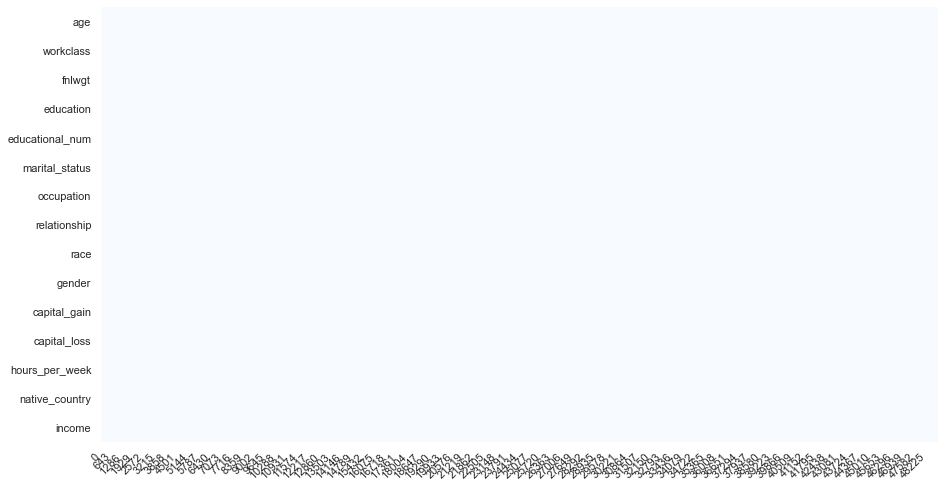

In [9]:
plot_missing_value(df)

### Plot Multiple Pairwise Bivariate Distributions

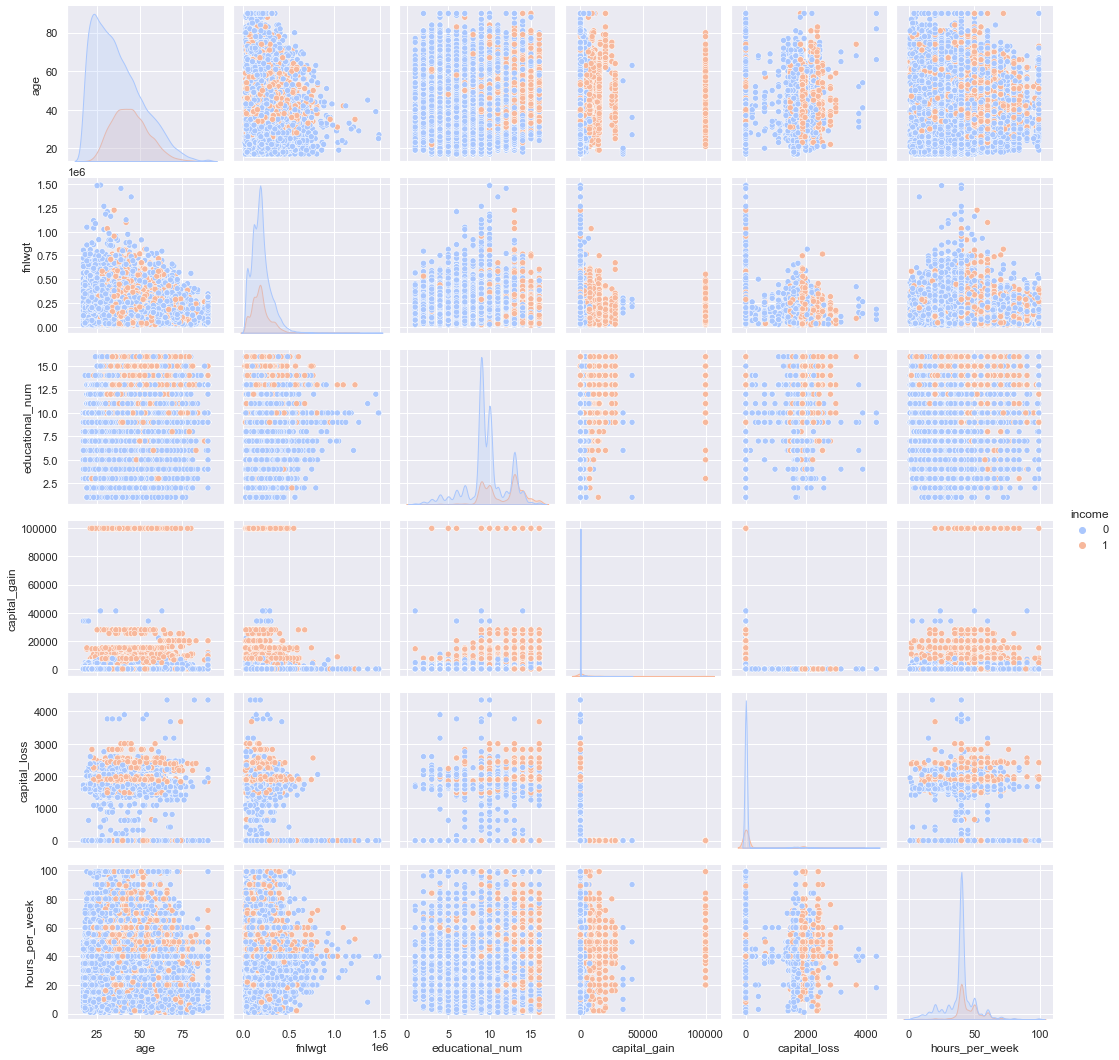

In [10]:
sns.pairplot(df,hue='income', palette='coolwarm')

### Check Imbalance Dataset

<AxesSubplot:xlabel='income', ylabel='count'>

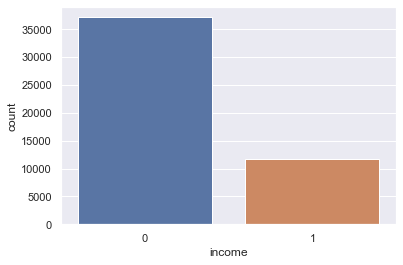

In [11]:
sns.countplot(df.income)

In [65]:
df.income.value_counts()

0    37155
1    11687
Name: income, dtype: int64

# 3. Dataset Splitting

In [58]:
X = df.drop(columns="income")
y = df.income

# 4. Modeling

In [35]:
numeric = list(X.select_dtypes([np.number]))
categoric = list(X.select_dtypes([np.object]))

In [36]:
model1 = AutoClassifier(num_feature=numeric, cat_feature=categoric)

In [37]:
model1.fit(X, y, cv=3, scoring='accuracy')

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[05:26:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
================== Best Model Info ==================
algo                      | XGBClassifier
algo__colsample_bytree    | 0.6381099809299767
algo__gamma               | 8
algo__learning_rate       | 0.13832094546570484
algo__max_depth           | 9
algo__n_estimators        | 161
algo__reg_alpha           | 0.02001342062287998
algo__reg_lambda          | 0.035868164986275514
algo__subsample           | 0.43567451588694794

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=True, strategy='most_frequent')
categorical_encoder  

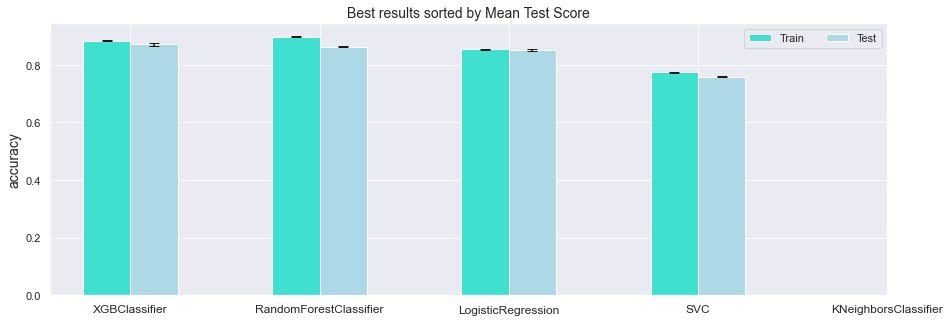

In [18]:
model1.plot_results()

# 5. Features Importance

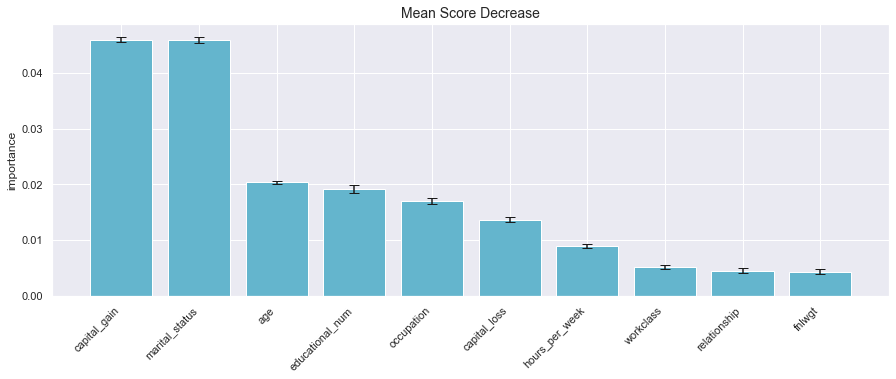

In [19]:
model1.mean_score_decrease()

In [66]:
model2 = AutoClassifier(num_feature= ['capital_gain','age','educational_num','capital_loss','fnlwgt'],
                      cat_feature=['marital_status','occupation','workclass','relationship'])

In [67]:
model2.fit(X, y, cv=3, scoring='accuracy', algo=['xgb'])

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[10:14:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
================== Best Model Info ==================
algo                      | XGBClassifier
algo__colsample_bytree    | 0.3678716570583799
algo__gamma               | 3
algo__learning_rate       | 0.060034839992196526
algo__max_depth           | 9
algo__n_estimators        | 118
algo__reg_alpha           | 0.0023181776112903493
algo__reg_lambda          | 0.018934530915191535
algo__subsample           | 0.7750309835254026

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=False, strategy='most_frequent')
categorical_encode

# 6. Polynomial Features

In [68]:
model1.fit(X, y, cv=3, scoring='accuracy', algo=['xgb'], poly=True)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[10:25:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
================== Best Model Info ==================
algo                      | XGBClassifier
algo__colsample_bytree    | 0.37430313234222623
algo__gamma               | 6
algo__learning_rate       | 0.10507384024181401
algo__max_depth           | 9
algo__n_estimators        | 161
algo__reg_alpha           | 0.007734482156646798
algo__reg_lambda          | 0.003016209262796776
algo__subsample           | 0.468807585701814

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=True, strategy='most_frequent')
categorical_encoder  

# 7. Evaluation

In [26]:
from jcopml.plot import plot_classification_report, plot_confusion_matrix, plot_pr_curve, plot_roc_curve

In [69]:
X_train = model1.X_train
y_train = model1.y_train
X_test = model1.X_test
y_test = model1.y_test

## 7.1. Classification Report

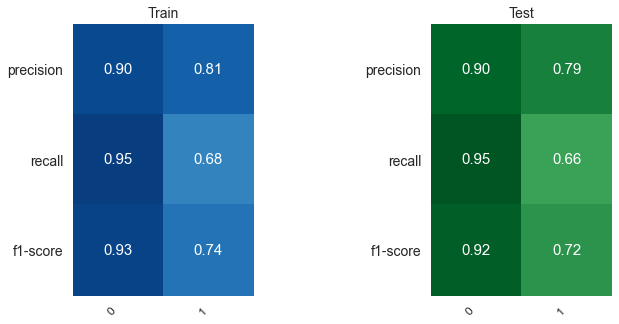

In [70]:
plot_classification_report(X_train, y_train, X_test, y_test, model1)

In [71]:
plot_classification_report(X_train, y_train, X_test, y_test, model1, report=True)

Train report
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     29724
           1       0.81      0.68      0.74      9349

    accuracy                           0.89     39073
   macro avg       0.86      0.82      0.83     39073
weighted avg       0.88      0.89      0.88     39073


Test report
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      7431
           1       0.79      0.66      0.72      2338

    accuracy                           0.88      9769
   macro avg       0.85      0.80      0.82      9769
weighted avg       0.87      0.88      0.87      9769



## 7.2. Precision vs Recall

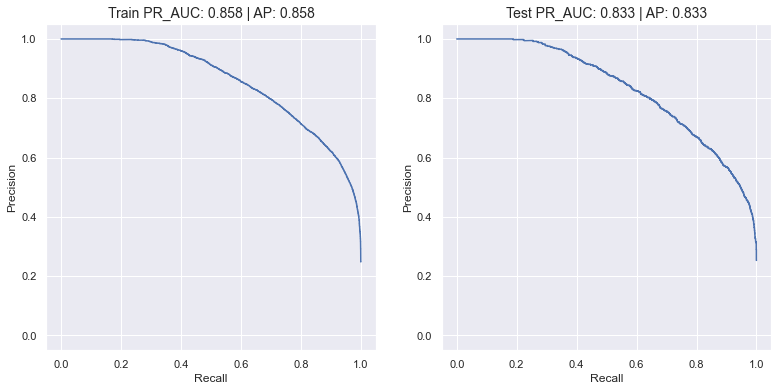

In [72]:
plot_pr_curve(X_train, y_train, X_test, y_test, model1.model) 

## 7.3. ROC AUC Curve

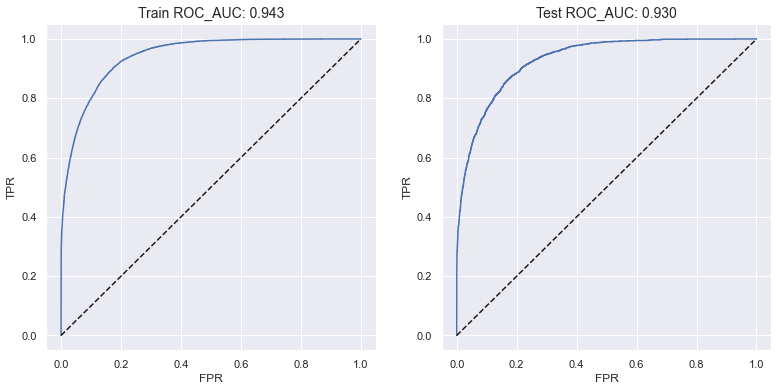

In [73]:
plot_roc_curve(X_train, y_train, X_test, y_test, model1.model) 

## 7.4. Confusion Matrix

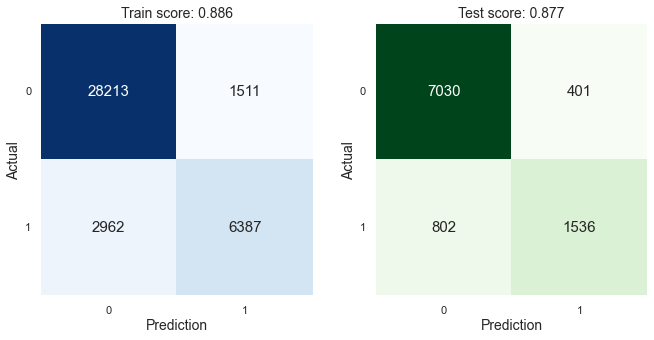

In [74]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model1.model)

# 8. Save Model

In [75]:
model1.save(fname= 'Income_Classification_AutoML_Baseline.pkl')

Model is pickled as model/Income_Classification_AutoML_Baseline.pkl
